# Data Driven Websites with Flask


---

### Let's take our weather API from last class and add a bit of complexity in the form of some formatting. In particular, we'll add some HTML (Hyper-Text Markup Language) – the standard markup language for any document meant to be displayed by a web browser. 

In [ ]:
# let's make sure we have our app up and running

1. Navigate to desired directory
2. `mkdir library_app`
3. `cd library_app`
4. `touch library.py`

### In library.py:

```python 

from flask import Flask

app = Flask(__name__)

# begin our Horror API

@app.route('/horror')
def horror():

    import requests

    url = 'http://openlibrary.org/subjects/horror.json'

    parameters = {
        'published_in'   : 2000-2010
    }

    resp = requests.get(url, params=parameters)

    data = resp.json()

    titles = set()

    for i in range(0, len(data)):
        title = data['works'][i]['title']
        titles.add(title)

    return 'Titles: {}'.format(sorted(titles))

app.run(host='0.0.0.0', port=5000, debug=True) # anyone can connect, and we're running on port 5000
    ```

5. `python library.py`

### Great, now if we go to http://0.0.0.0:5000/horror we'll see our app is up and running. 

---

### So far so good. Let's get a bit fancier, though, and add a personalized welcome message to each user that visits the site. In library.py, let's add the following: 

```python 

from datetime import * 

... # keep your /horror route here, but add the '/' below

@app.route("/")
def hello_visitor():
    datetime.now().strftime('%Y-%m-%d %H:%M:%S') # get the current time from datetime
    date = datetime.now().strftime('%Y-%m-%d') # get today's date from the current time 
    time = datetime.now().strftime('%H:%M:%S') # get the current time from the current time 
    message = "The date is {d} and the time is {t}" # create the message telling us the current date and time 
    return message.format(d=date, t=time) # return our message 

... # keep the 'app.run' info as well

```

### Great, now if we go to http://0.0.0.0:5000/ we'll see our message. 

---

### In order to prettify (add HTML) to our date and time message, we create a new HTML file in our directory. 

1. Navigate to our library_app directory
2. `mkdir templates`
3. `cd templates`
4. `touch index.html`

### In index.html, we'll specify how we want everything to look: 

```html 

<!DOCTYPE html>
<html>
<head>
    <title>Welcome Message</title>
</head>
<body>
    <div style="color: purple">
    <h1>Hello World! Here's some fun info! {{ message }}</h1>
        <strong>Below an image is displayed</strong>
        <img width="300" src="https://upload.wikimedia.org/wikipedia/en/thumb/5/58/NYU_logo.svg/1280px-NYU_logo.svg.png"/>
    </div>
</body>
</html> 

```

### And, in order to specify that we want our app to leverage this template, we add the following to library.py:

```python 

from Flask import render_template

# ...

@app.route("/")
def hello_visitor():
    datetime.now().strftime('%Y-%m-%d %H:%M:%S') # get the current time from datetime
    date = datetime.now().strftime('%Y-%m-%d') # get today's date from the current time
    time = datetime.now().strftime('%H:%M:%S') # get the current time from the current time
    message = "The date is {} and the time is {}".format(date, time) # create the message
    return render_template("index.html",message=message) # return our message

```

---

## Exercise 1

### Looking back to last week, adjust your library Flask app so that rather than being greated by the date, time, and visitor count, a visitor is told their location, the weather, and temperature. 

In [ ]:
# your code here

```python 

@app.route("/")
def hello_visitor(): 
    
    import requests
    
    geoip_url = 'http://api.ipstack.com/check?access_key=dd4cbbbe9d6b9f2709e5f0533644e547'
    resp = requests.get(geoip_url)
    data = resp.json()
    lon = data["longitude"]
    lat = data["latitude"]

    openweathermap_url = "http://api.openweathermap.org/data/2.5/weather"
    parameters = {
        'lat'   : str(lat),
        'lon'   : str(lon),
        'units' : 'imperial',
        'mode'  : 'json',
        'appid' : 'ffb7b9808e07c9135bdcc7d1e867253d'
    }

    resp = requests.get(openweathermap_url, params=parameters)
    data = resp.json()

    location = data['name']
    weather = data['weather'][0]['description']
    temperature = data['main']['temp']

    message = "Your Location: {}, Your Weather: {}, Your Temp: {}".format(location, weather, temperature)
    
    return render_template("index.html", message=message)

```

---

## Jinja Iterators

### We can also leverage what is known as a "Jinja iterator" – basically allowing us to render if / else statements in our template. For example, let's alter index.html file:

``` html

<!DOCTYPE html>
<html>
    
```

`{% if temperature <= 32 %}`

``` html

<div style = "color: blue">
<body>
  <h1>Hello! {{ message }}. It is below freezing outside, bring a jacket!</h1>
</body>
</div>

```

`{% endif %}`

`{% if temperature > 32 %}`

``` html

<div style = "color: red">
<body>
  <h1>Hello! {{ message }}. It is warm outside, awesome!</h1>
</body>
</div>

```

`{% endif %}`

```  
</html> 

```

### We also need to make an addition to our library.py file:

```python 

    # ... 
    
    location = data['name']
    weather = data['weather'][0]['description']
    temperature = data['main']['temp']

    message = "Your Location: {}, Your Weather: {}, Your Temp: {}".format(location, weather, temperature)
    
    return render_template("index.html", message=message, location=location, weather=weather, temperature=temperature)

```

---

### So far so good. But what happens if we want to call upon a SQL database, such as our Citibike database from Week 1, and display it in a Flask application?

``` python
@app.route("/citibike")
def citibike():

    import sqlite3

    con = sqlite3.connect('/Users/siegmanA/Desktop/library_app/citibikeDataForFlask.db') # connect to our db
    cursor = con.cursor()

    # retrieve records of all tables and construct dictionaries for convenient usage at HTML tamplates

    station_data = cursor.execute("SELECT station_id, stationName, availableBikes, lastCommunicationTime FROM StationsData LIMIT 5")

    station_data = [{"station_id": i[0], "stationName": i[1], "availableBikes": i[2], "lastCommunicationTime": i[3]} for i in station_data]

    return render_template('citibike.html', station_data=station_data)
```

### We then create a file called citibike.html in the templates folder.

``` html
<!DOCTYPE html>
<html>
<body>
  <table>
    <thead>
      <tr>
        <th>Station ID</th>
        <th>Station Name</th>
        <th>Available Bikes</th>
        <th>Last Communication Time</th>
      </tr>
    </thead>
    <tbody>
      {% for i in station_data %}
	<tr>
        <td>{{ i.station_id }}</td>
        <td>{{ i.stationName }}</td>
        <td>{{ i.availableBikes }}</td>
        <td>{{ i.lastCommunicationTime }}</td>
	</tr>
      {% endfor %}
    </tbody> 
  </table>
</body>
</html>
```

---

## Getting Parameters and Passing to SQL

### Now let's see how we can query for the status of a Citibike station over time.

### Here, we want to create a new function, where we will pass the `station_id` as a **parameter**. Then our code will read the value of the parameter `station_id` and then will query the database to get the status of that station.

### Let's make some additions to library.py:

``` python
from flask import request

@app.route("/station_status")
def station_status():

    import sqlite3

    user_station_id = request.args.get('station_id')

    con = sqlite3.connect('/Users/siegmanA/Desktop/library_app/citibikeDataForFlask.db') # connect to our db
    cursor = con.cursor()

    # retrieve records of all tables and construct dictionaries for convenient usage at HTML tamplates

    station_data = cursor.execute("SELECT station_id, stationName, availableBikes, lastCommunicationTime FROM StationsData WHERE station_id = ? LIMIT 5", [user_station_id,])

    station_data = [{"station_id": i[0], "stationName": i[1], "availableBikes": i[2], "lastCommunicationTime": i[3]} for i in station_data]

    return render_template('citibike.html', station_data=station_data,user_station_id=user_station_id)
```

### Now we can pass a parameter through our URL, such as http://0.0.0.0:5000/station_status?station_id=72

---

# Beautifying the app using Bootstrap

Our HTML pages aren't exactly visually pleasing. Lucky for us, [Twitter's Bootstrap](http://getbootstrap.com/) is an excellent set of carefully crafted user interface elements, layouts and JavaScript tools, easily available to use in your web design project. 

All you need is to create a link to the [Bootstrap resources](http://getbootstrap.com/getting-started/#download-cdn) in the HTML head and use the predefined CSS styles.

### Let's change the HTML in the `templates/citibike.html` file, to add a few Bootstrap elements:

```html
<!DOCTYPE html>
<html>
<head>
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css" integrity="sha384-MCw98/SFnGE8fJT3GXwEOngsV7Zt27NXFoaoApmYm81iuXoPkFOJwJ8ERdknLPMO" crossorigin="anonymous">
</head>
<body>
    <div class="container">
        <div class="panel panel-info">
            <div class="panel-heading">
                <h1 class="panel-title">Citibike Stations</h1>
            </div>
            <table  class="table table-striped table-bordered table-hover">
    <thead>
      <tr>
        <th>Station ID</th>
        <th>Station Name</th>
        <th>Available Bikes</th>
        <th>Last Communication Time</th>
      </tr>
    </thead>
    <tbody>
      {% for i in station_data %}
	<tr>
        <td>{{ i.station_id }}</td>
        <td>{{ i.stationName }}</td>
        <td>{{ i.availableBikes }}</td>
        <td>{{ i.lastCommunicationTime }}</td>
	</tr>
      {% endfor %}
    </tbody>
    </table>
  </div>
</div>
</body>
</html>
```

---

## We can also display plots in our Flask app

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
import sqlite3
import pandas as pd
from matplotlib.pyplot import *
import matplotlib as plt
from flask import request

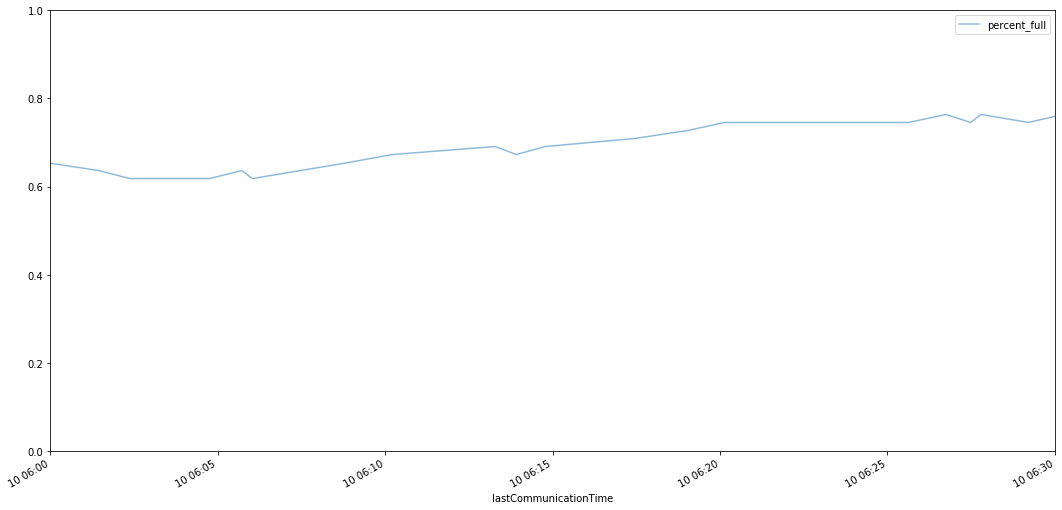

In [11]:
con = sqlite3.connect('citibikeDataForFlask.db') # connect to our database

user_station_id = 72 # request.args.get('station_id')

df = pd.read_sql("""SELECT station_id,
                    stationName,
                    availableBikes,
                    availableDocks,
                    totalDocks,
                    latitude,
                    longitude,
                    lastCommunicationTime
                FROM StationsData WHERE station_id = (?)""", con, params=[user_station_id])

df['lastCommunicationTime'] = pd.to_datetime(df['lastCommunicationTime'], format='%Y-%m-%d %H:%M:%S %p')

df['percent_full'] = df['availableBikes']/df['totalDocks']

df = df[df.lastCommunicationTime != '1969-12-31 07:00:00']

station_timeseries = df.pivot_table(
                        index='lastCommunicationTime',
                        values='percent_full',
                        aggfunc='mean'
                    ).interpolate(method='time')

plot = station_timeseries.plot(alpha=.5, figsize=(18, 9), ylim=(0,1), xlim=('2019-10-10 06', '2019-10-10 06:30'))


In [13]:
filename = 'example.png'
fig = plot.get_figure()
fig.savefig(filename)
fig.clear()

### Now, to display that static image on our site, we need to: 

1. Create a place to store and serve the image. In our case, we create a folder called 'static' in our directory where Flask will go to find and serve "_static_" files
2. Store the plot as an image under the static folder
3. Modify our HTML code to display the image

### In citibike.html, add the following: 

``` html
<img class="center-block" src="{{image}}" />
```

### In library.py, add the following: 

```python
import sqlite3
import pandas as pd
from matplotlib.pyplot import *
import matplotlib as plt
matplotlib.use('Agg')

def create_plot(station,con):
    con = sqlite3.connect('citibikeDataForFlask.db') # connect to our database
    user_station_id = request.args.get('station_id')

    df = pd.read_sql("""SELECT station_id,
                    stationName,
                    availableBikes,
                    availableDocks,
                    totalDocks,
                    latitude,
                    longitude,
                    lastCommunicationTime
                FROM StationsData WHERE station_id = (?)""", con=con, params=[user_station_id])

    df['lastCommunicationTime'] = pd.to_datetime(df['lastCommunicationTime'], format='%Y-%m-%d %H:%M:%S %p')

    df['percent_full'] = df['availableBikes']/df['totalDocks']

    df = df[df.lastCommunicationTime != '1969-12-31 07:00:00']

    station_timeseries = df.pivot_table(
                        index='lastCommunicationTime',
                        values='percent_full',
                        aggfunc='mean'
                    ).interpolate(method='time')

    plot = station_timeseries.plot(alpha=.5, figsize=(18, 9), ylim=(0,1), xlim=('2019-10-10 06', '2019-10-10 06:30'))

    filename = 'static/plot-'+str(station)+ '.png'
    fig = plot.get_figure()
    fig.savefig(filename)
    fig.clear()

    return filename
```

### Finally, in library.py, we'll add to our station_status() function: 

```python
@app.route("/station_status")
def station_status():

    con = sqlite3.connect('citibikeDataForFlask.db') # connect to our database

    user_station_id = request.args.get('station_id')

    con = sqlite3.connect('/Users/siegmanA/Desktop/library_app/citibikeDataForFlask.db') # connect to our db
    cursor = con.cursor()

    # retrieve records of all tables and construct dictionaries for convenient usage at HTML tamplates

    station_data = cursor.execute("SELECT station_id, stationName, availableBikes, lastCommunicationTime FROM StationsData WHERE station_id = ? LIMIT 5", [user_station_id,])

    station_data = [{"station_id": i[0], "stationName": i[1], "availableBikes": i[2], "lastCommunicationTime": i[3]} for i in station_data]

    image_filename = create_plot(user_station_id, con)

    return render_template('citibike.html', station_data=station_data, user_station_id=user_station_id, image=image_filename)
```






---

## Querying via Flask

### Last but not least, what happens if we want to query from our Citibike database? 

### For this, we'll use the [Flask-SQLAlchemy](http://flask-sqlalchemy.pocoo.org/2.1/) extension to manage our application, because the usage of direct queries is really not convenient. 

### This extension provides a wrapper for the SQLAlchemy project, which is an [Object Relational Mapper (ORM)](https://en.wikipedia.org/wiki/Object-relational_mapping). ORMs allow database applications to work with objects instead of tables and SQL. The operations performed on the objects are translated into database commands transparently by the ORM. 

In [ ]:
# SOURCES:

# 1. https://towardsdatascience.com/sqlalchemy-python-tutorial-79a577141a91
# 2. https://kite.com/blog/python/flask-sqlalchemy-tutorial/
# 3. 

---

---

---

# Below is info on SQLAlchemy without Flask 

In [ ]:
# !pip install sqlalchemy / !conda install sqlalchemy

In [ ]:
import sqlalchemy as db
engine = db.create_engine('sqlite:///citibikeDataForFlask.db')

In [ ]:
connection = engine.connect()

In [ ]:
metadata = db.MetaData()

In [ ]:
citibike = db.Table('StationsData', metadata, autoload=True, autoload_with=engine)

In [ ]:
# SqlAlchemy’s autoload functionality, which will introspect the table and pull out the field names in a rather 
# magical way. We’ll start off with the autoload method and then show the long way in the next section.

In [ ]:
citibike

In [ ]:
print(citibike.columns.keys())

In [ ]:
query = db.select([citibike])
ResultProxy = connection.execute(query)
ResultSet = ResultProxy.fetchall()

# this is equivalent to "SELECT * FROM StationsData"

In [ ]:
ResultSet[:5]

In [ ]:
import pandas as pd

df = pd.DataFrame(ResultSet)

In [ ]:
df

In [ ]:
query = db.select([citibike]).where(citibike.columns.station_id == 301)
ResultProxy = connection.execute(query)
ResultSet = ResultProxy.fetchall()

ResultSet

---

---

---

# Below is SQLAlchemy with Flask